# <font color='red'>Regression-King county ev fiyatlari tahmini</font>

In [3]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('kc_house_data.csv')

In [7]:
# EDA-Exploratory DAta Analysis

In [10]:
df.head() #ilk 5 satiri gormek icin

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.tail() #son 5 satiri gormek icin

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [12]:
df.info() #genel bilgileri gormek icin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [13]:
df.describe() #butun sutunlarin istatiklerini veriyor

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
pwd # dosya yerini gormek

'C:\\Users\\Utilisateur\\Documents\\AI\\Lessons\\day3'

In [19]:
df.corr() # matematik olarak sutunlar arasi bir cok baglantiyi veriyor

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [20]:
df.shape #kac satir kac sutun oldugunu gosteriyor

(21613, 21)

In [21]:
# Eigen Value Eigen vector 

In [22]:
import seaborn as sns   # grafikler icin kutuphane yukledik

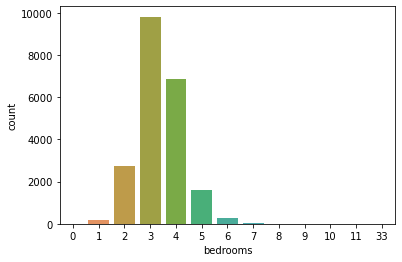

In [23]:
sns.countplot(x=df['bedrooms']);

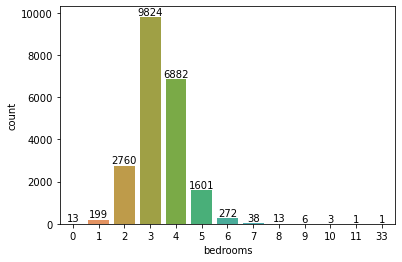

In [24]:
ax=sns.countplot(x=df["bedrooms"]);
ax.bar_label(ax.containers[0]);
# barlarin uzerlerine degerlerini yazmak icin

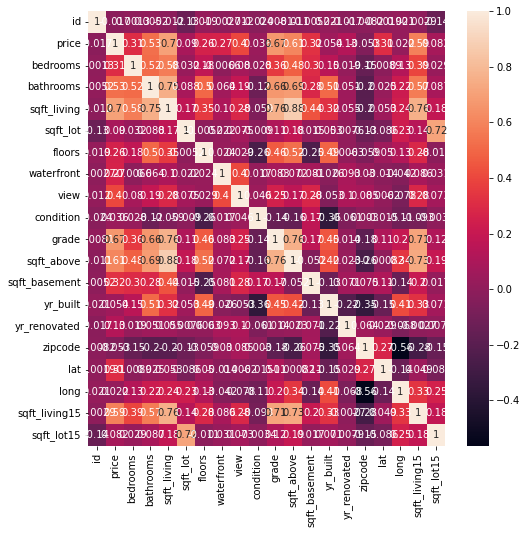

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True);

In [26]:
abs(df.corr()['price'].sort_values(ascending=False))
#abs veri cok fazla oldugunda icinden bazilari secmeyi ve sort ile siralama yaptik 
# Kriterimiz 0.20 ile 0.90 arasini aliyoruz 
#Korelasyon cesitleri = Pearson, Spearman, Kendall

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id               0.016762
zipcode          0.053203
Name: price, dtype: float64

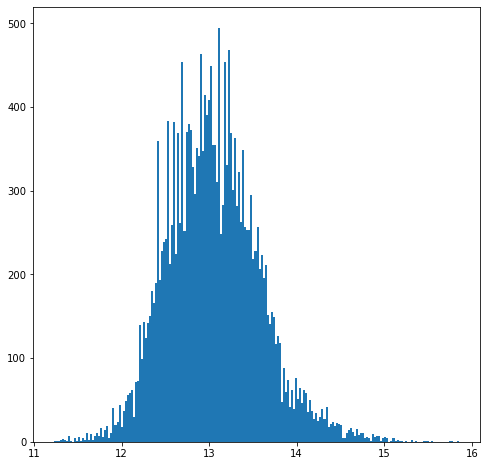

In [27]:
plt.figure(figsize=(8,8))
plt.hist(np.log(df.price),bins=200);

In [23]:
# Featuring Enginering

In [29]:
df['zipcode']=df['zipcode'].astype('object')

In [30]:
df=df[df['bedrooms']<10]
#10 odali ve 7 banyolu evleri cikaridik

In [31]:
df=df[df['bathrooms']<7]

In [32]:
df['bathrooms']=df['bathrooms']**2

In [33]:
df['bedrooms']=df['bedrooms']**2
#yatak odasi ve banyo onemli oldugu icin katsayisini arttirmak icin karesini aldik

In [34]:
df['age']=2022-df['yr_built']

In [36]:
df['basement']=np.where(df['sqft_basement']>0,1,0)
df['renovated']=np.where(df['yr_renovated']>0,1,0)
#bodrum kati olan ve tadilat goren evlere 1 saisini verdik

In [37]:
df.quantile(.97).astype('int')

id              -2147483648
price               1388000
bedrooms                 25
bathrooms                12
sqft_living            4140
sqft_lot              67364
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3700
sqft_basement          1339
yr_built               2013
yr_renovated           1989
lat                      47
long                   -121
sqft_living15          3560
sqft_lot15            51400
age                     112
basement                  1
renovated                 1
Name: 0.97, dtype: int32

In [38]:
outliers = df.quantile(.97)
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]
#outliesr olanlari cikardik

In [28]:
#sns.pairplot(df) 
#butun verilerin butun sutunlarla iliskisini gorebiliriz

### Modelling

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
from sklearn.metrics import r2_score, mean_squared_error
#r2 basari yuzdesini gosteriyor %85 i gecince basarili sayiyoruz

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression()

In [43]:
#sonuc beklenmedik cikti.Bu sebeple markasi yazi olan ifadeyi nasil sayiya cevirip kolerasyona ekleyebilirm

In [44]:
x=df[['sqft_living','grade','sqft_above','bathrooms','view','basement','condition','waterfront','floors','zipcode','renovated','age','bedrooms']]

y=df[['price']]

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
x=pd.get_dummies(x,drop_first=True)
#Bu kisim artik bir matrix olusturdu icinde bol sifirli degerler var bu sayede egitim isi daha net oldu

In [49]:
x.head()

,sqft_living,grade,sqft_above,bathrooms,view,basement,condition,waterfront,floors,renovated,age,bedrooms,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,7,1180,1.0000,0,0,3,0,1.0,0,67,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570,7,2170,5.0625,0,1,3,0,2.0,1,71,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,6,770,1.0000,0,0,3,0,1.0,0,89,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,7,1050,9.0000,0,1,5,0,1.0,0,57,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1680,8,1680,4.0000,0,0,3,0,1.0,0,35,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df[['price']]

In [51]:
y.shape

(19034, 1)

In [54]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [58]:
#pd.to_pickle("kc_house.pkl")

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((15227, 81), (3807, 81), (15227, 1), (3807, 1))

In [67]:
lr = LinearRegression()
model=lr.fit(x_train,y_train)
#Modeli egitmek icin fit kullanilir. Model verinin her birimini gezip ogreniyor

In [68]:
tahmin=model.predict(x_test)
#egitilen model ile kenara saklanan verileri tahmin edebiliriz

In [69]:
(mean_squared_error(tahmin,y_test))**0.5
#Hata bilgisi// karekokunu almak icin 0.5 ile carptik

94991.5139772454

In [71]:
r2_score(y_test,tahmin)
#Basari

0.8237299515351564

In [124]:
# Bir onceki denemeye gore %97 basari sagladi.Artik makina araba fiyatlarini ogrendi artik tahmin edebilir

In [72]:
from sklearn.linear_model import Ridge, Lasso

In [73]:
R=Ridge()
L=Lasso()
#Iki tahmin metoduyla testimizi guclendirelim

In [74]:
R.fit(x_train,y_train)

Ridge()

In [75]:
tahmin2=R.predict(x_test)

In [76]:
(mean_squared_error(tahmin2,y_test))**0.5

95193.2327051809

In [130]:
r2_score(tahmin2,y_test)

0.7462396594115723

In [77]:
L = Lasso()
L.fit(x_train,y_train)

Lasso()

In [78]:
tahmin3=L.predict(x_test)

In [79]:
(mean_squared_error(tahmin3,y_test))**0.5

94993.66275691557

In [82]:
r2_score(y_test,tahmin3) # PARANTEZ ICI YER DEGISTIGINDE SONUC NEDEN DEGISIYOR

0.82372197672215

In [83]:
#farkli metodlarla tahminlerimizi test ettik ve emin olduk

In [84]:
from sklearn.linear_model import ElasticNet

In [85]:
E=ElasticNet(l1_ratio=0.8)
#Ridge ve Lasso dan gelen verileri ayni anda calistiriyor ve %80 i Lasso dan aliyor

In [86]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [87]:
tahmin4=E.predict(x_test)

In [89]:
r2_score(y_test,tahmin4)

0.6029948817602795